**Lab 4**

Problem 1

1)
We are gong to be looking at a large dataset this week of 25 million rows
Lets first import it

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pandas as pd
import math
from scipy import optimize

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (10,3)

In [2]:
hf = h5py.File('gammaray_lab4.h5', 'r')


In [3]:
hf.keys()

<KeysViewHDF5 ['data']>

In [4]:
data = np.array(hf.get('data'))
data[1]

array([315.        , 315.00711228, 315.01422457, ..., 345.31910877,
       345.32622105, 345.33333333])

In [5]:
hf.close

<bound method File.close of <HDF5 file "gammaray_lab4.h5" (mode r)>>

In [6]:
Data = pd.DataFrame({'time':data[0], 'Solar phase' : data[1] , 'Earth phase':data[2], 'particle counts':data[3]})

Now let’s look through the data to find a way to model the background, we have data for particle count in a 100 millisecond window as well as meta data for the earth phase and solar phase

Looking at the particle counts vs time graph we see some periodic counts lets look to see if this could have somthhing to do with the earth or the solar phases

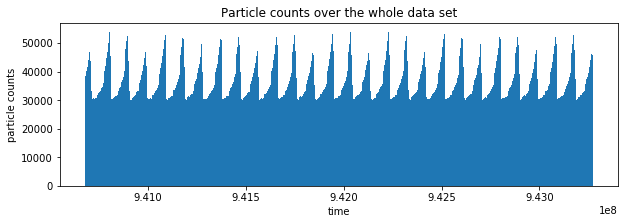

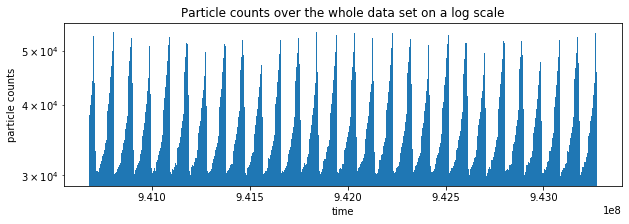

In [7]:

plt.hist(Data['time'],weights=Data['particle counts'], bins=5000)
#plt.yscale('log')
plt.xlabel('time')
plt.ylabel('particle counts')
plt.title('Particle counts over the whole data set')
plt.show()

plt.hist(Data['time'],weights=Data['particle counts'], bins=5000)
plt.yscale('log')
plt.xlabel('time')
plt.ylabel('particle counts')
plt.title('Particle counts over the whole data set on a log scale')
plt.show()

Below we can see that there really is not a corilations of the particl counts to the solar phase

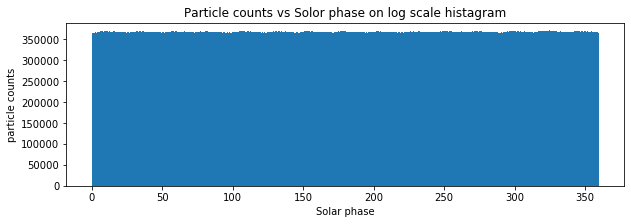

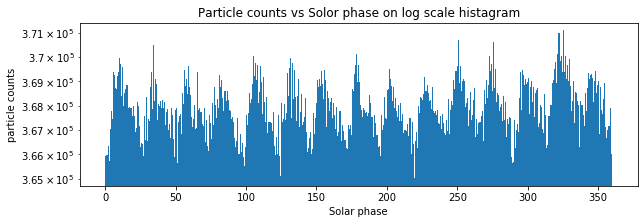

In [8]:
plt.hist(Data['Solar phase'],weights=Data['particle counts'], bins=500)
plt.xlabel('Solar phase')
plt.ylabel('particle counts')
plt.title('Particle counts vs Solor phase on log scale histagram')

#plt.yscale('log')
plt.show()
plt.hist(Data['Solar phase'],weights=Data['particle counts'], bins=500)
plt.xlabel('Solar phase')
plt.ylabel('particle counts')
plt.title('Particle counts vs Solor phase on log scale histagram')

plt.yscale('log')
plt.show()

Now when looking at the partcle counts vs the earth phase we see a nice ditsrbuint this is going to be how we make the background

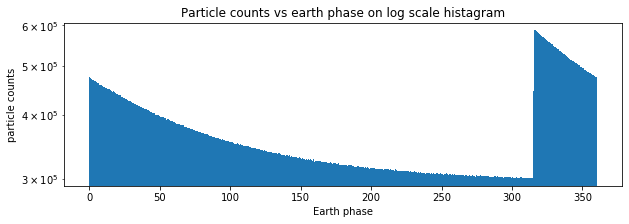

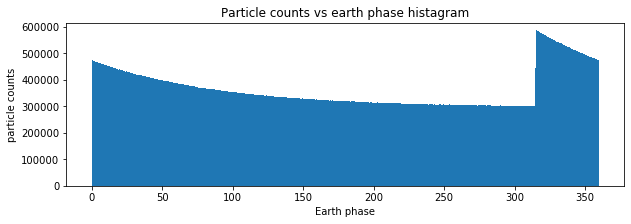

In [9]:
plt.hist(Data['Earth phase'],weights=Data['particle counts'], bins=500)
plt.yscale('log')
plt.ylabel('particle counts')
plt.xlabel('Earth phase')
plt.title('Particle counts vs earth phase on log scale histagram')
plt.show()

plt.hist(Data['Earth phase'],weights=Data['particle counts'], bins=500)
#plt.yscale('log')
plt.ylabel('particle counts')
plt.xlabel('Earth phase')
plt.title('Particle counts vs earth phase histagram')
plt.show()

Lets make sure that the phase changes consitatly over time since we are going to want to find a time depence for the phase

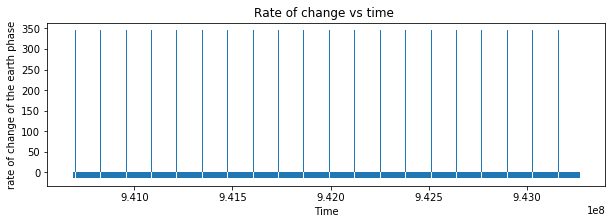

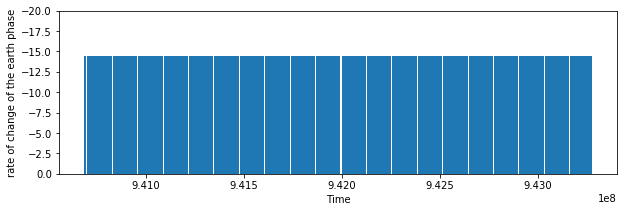

In [21]:
Diff = Data['Earth phase'].diff()
plt.ylabel('rate of change of the earth phase')
plt.xlabel('Time')
plt.title('Rate of change vs time ')
plt.hist(Data['time'],weights=Diff, bins=500)
plt.show()
Diff = Data['Earth phase'].diff()
plt.ylabel('rate of change of the earth phase')
plt.xlabel('Time')
plt.hist(Data['time'],weights=Diff, bins=500)
plt.ylim([0,-20])
plt.show()

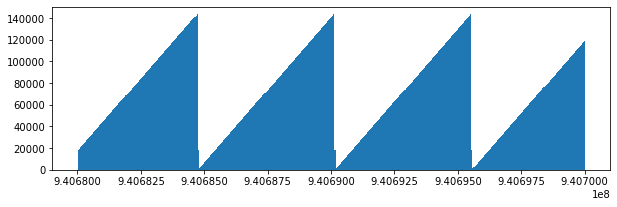

In [11]:
plt.hist(Data['time'].iloc[0:200000],weights=Data['Earth phase'].iloc[0:200000], bins=500)
#plt.yscale('log')
plt.show()

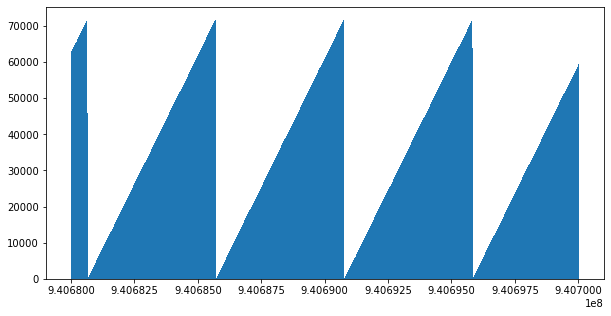

In [27]:
plt.hist(Data['time'].iloc[0:200000],weights=Data['Solar phase'].iloc[0:200000], bins=1000)
plt.show()

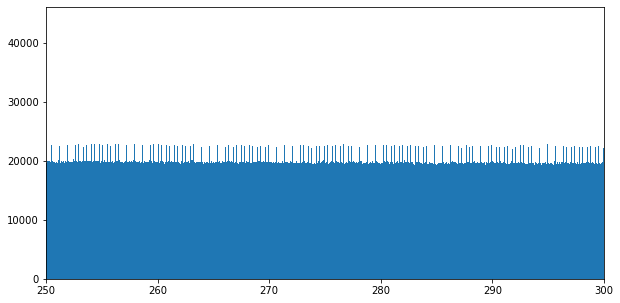

In [13]:
plt.hist(Data['Earth phase'],weights=Data['particle counts'], bins=7500)
#plt.yscale('log')
plt.xlim([250,300])
plt.show()

In [20]:
math.remainder(10,3)

1.0

In [22]:
count , bins = np.histogram(Data['Earth phase'],weights=Data['particle counts'],bins=500)
bins = np.delete(bins, 0)

In [23]:
Hist = pd.DataFrame({ 'Earth phase':bins, 'particle counts':count, 'd':np.append(np.diff(count),0)})


In [25]:
d = np.append(np.diff(count),0)
d= np.append(d,0)

In [ ]:
s=np.append(Hist.loc[339:500],Hist.loc[0:335])

In [ ]:
plt.hist(Data['time'].iloc[0:200000],weights=Data['Earth phase'].iloc[0:200000], bins=1000)
plt.yscale('log')

In [50]:
t = Data['time']
Ep = Data['Earth phase']
Sp = Data['Earth phase']
c = Data['particle counts']